In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Fonction récursive de calcul du déterminant

#### fonctions qui vont servir ensuite ..

In [2]:
def reduit(A,i,j):
    result = np.delete(A,i,axis=0)
    result = np.delete(result,j,axis=1)
    return result
    
def taille_matrice_carre(A):
    return A.shape[0]

In [3]:
#

n = 3
A = np.random.randint(0,10,(n,n))
print("A:\n",A,"\n\n")

print("reduit(A,1,2):\n", reduit(A,1,2),'\n')

print("taille A:",taille_matrice_carre(A))

A:
 [[1 5 7]
 [5 2 4]
 [9 8 9]] 


reduit(A,1,2):
 [[1 5]
 [9 8]] 

taille A: 3


In [4]:
def determinant(A):
    ...
    
    
    
print('résultat sur A:', determinant(A))
print('Comparaison avec la fonction déterminant de numpy:', np.linalg.det(A))

résultat sur A: None
Comparaison avec la fonction déterminant de numpy: 95.00000000000007


### 2.5. Exemple: vérification calcul inverse de P

In [5]:
P = np.array([[1,2,1],
              [-1,-1,-1],
              [0,-2,-2]])

np.linalg.inv(P)

array([[ 0. , -1. ,  0.5],
       [ 1. ,  1. , -0. ],
       [-1. , -1. , -0.5]])

### 2.5

#### exo 1

In [6]:
A = np.array([[1,0,-1],
              [2,0,-3],
              [4,2,1]])

np.linalg.inv(A)

array([[ 3. , -1. ,  0. ],
       [-7. ,  2.5,  0.5],
       [ 2. , -1. ,  0. ]])

#### exo 2

In [7]:
b = np.array([3,2,-1])
X = np.linalg.inv(A) @ b

print('(x, y, z) =',X)

(x, y, z) = [  7.  -16.5   4. ]


#### exo 3

###### à revoir ...

In [8]:
def pivot_gauss(A):
    n = A.shape[0]
    In = np.eye(n)
    bloc = np.hstack((A,In))
    
    # Etape 1 : mettre triangle inférieure de A à zéro
    #sur les n-1 colonnes
    ...
            
    # Etape 2 : mettre triangle supérieure de A à zéro
    #sur les n-1 colonnes
    ...
    
    # Etape 3: normalisation
    ...
    
    # récupération bloc droit
    inv_A = bloc[:,n:]
        
    return inv_A
    
pivot_gauss(P)

array([[ 0. , -1. ,  0.5],
       [ 1. ,  1. ,  0. ],
       [-1. , -1. , -0.5]])

#### 2.6. Exo interpolation

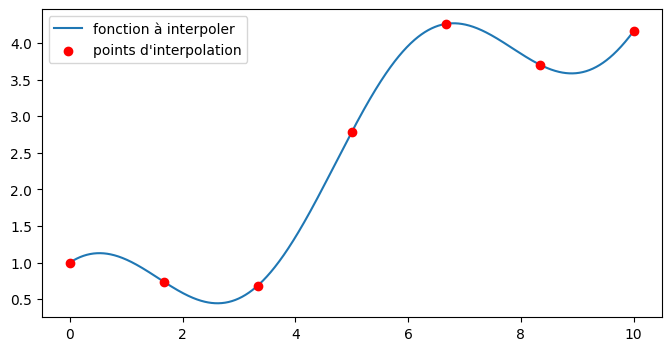

In [9]:
N = 10**3
xx = np.linspace(0, 10, N)
def f(x):
    return x*0.5 + np.cos(x)

plt.figure(figsize=(8,4))
plt.plot(xx,f(xx),label='fonction à interpoler');

n = 7

# création de points d'interpolation
xi = np.linspace(0, 10, n)
yi = f(xi)
plt.scatter(xi, yi,label="points d'interpolation",c='r',zorder=3)
plt.legend();

$$
p(x_i) = y_i \;\, \forall i=1,...,n
$$
C'est à dire

$$
\sum_{k=0}^{n-1}a_k x_i^k = y_i \;\, \forall i=1,...,n
$$

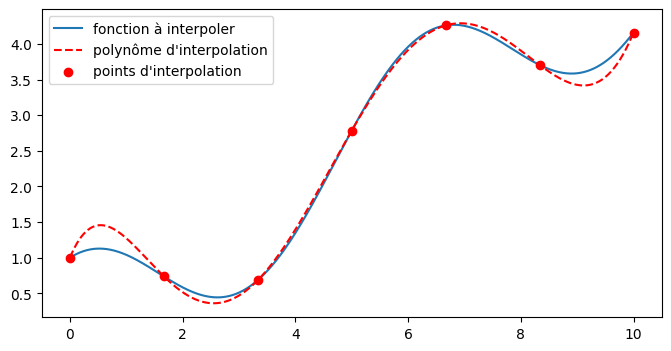

In [10]:
# matrices des conditions sur les coefficients:
V = np.zeros((n,n))
# remplissage matrice V
...
        
coefs = np.linalg.solve(V, yi)

def p(x):
    px = np.zeros_like(x)
    for k in range(n):
        px += coefs[k] *x**k
    return px

plt.figure(figsize=(8,4))

plt.plot(xx,f(xx),label='fonction à interpoler');
plt.plot(xx,p(xx),label="polynôme d'interpolation",c='r',linestyle='--');

plt.scatter(xi, yi,label="points d'interpolation",c='r',zorder=3)
plt.legend();